## Ejemplo Clustering Aglomerativo

In [1]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

set_config(transform_output="pandas")

df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
X = df.drop(columns="species")
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


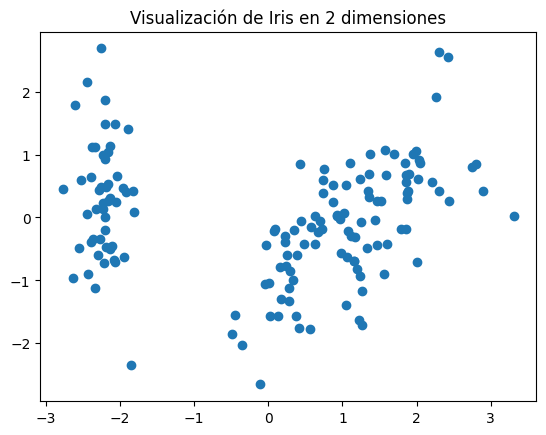

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_iris = pca.fit_transform(X_sc)


def pca_viz(pca, color=None, title=""):
    plt.scatter(pca_iris["pca0"], pca_iris["pca1"], c=color)
    plt.title(title)
    plt.show()


pca_viz(pca_iris, title="Visualización de Iris en 2 dimensiones")

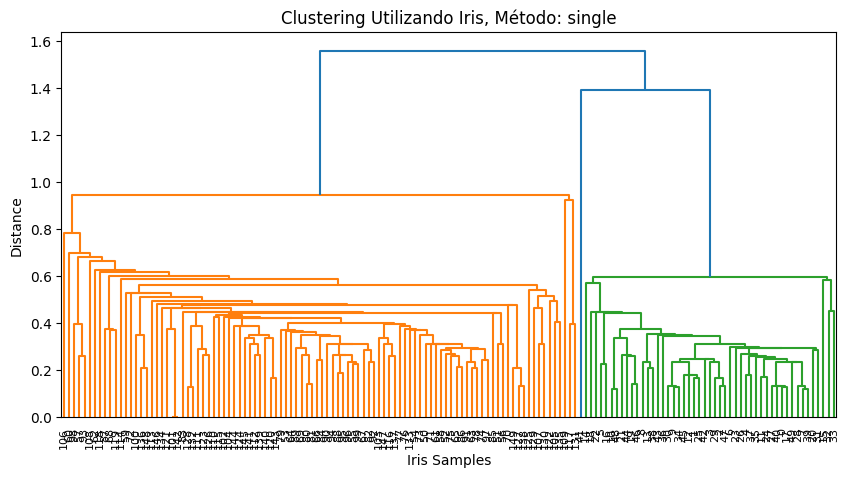

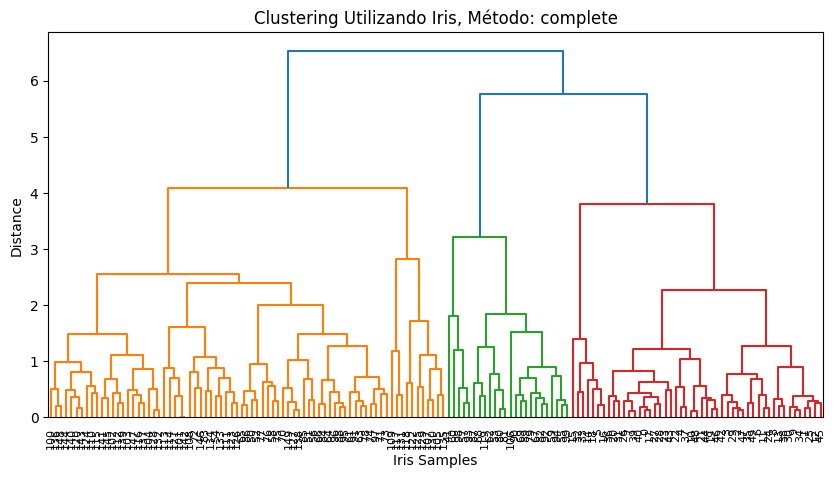

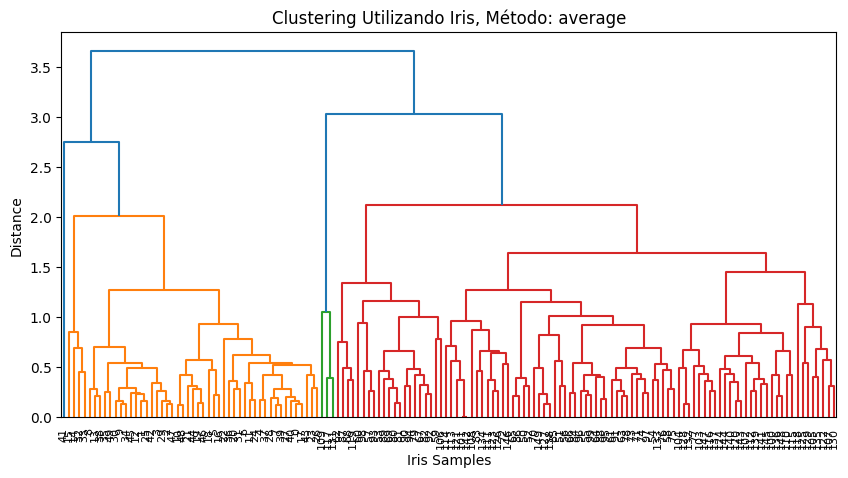

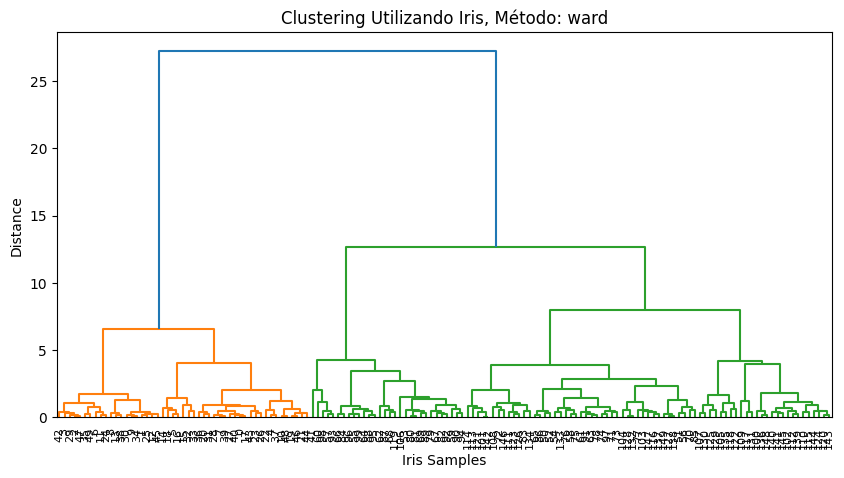

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage


def plot_dendogram(X, link="ward"):
    Z = linkage(X, method=link)

    plt.figure(figsize=(10, 5))
    plt.title(f"Clustering Utilizando Iris, Método: {link}")
    plt.xlabel("Iris Samples")
    plt.ylabel("Distance")
    dendrogram(Z, leaf_rotation=90.0, leaf_font_size=8.0)
    plt.show()


link_list = ["single", "complete", "average", "ward"]
for l in link_list:
    plot_dendogram(X_sc, link=l)

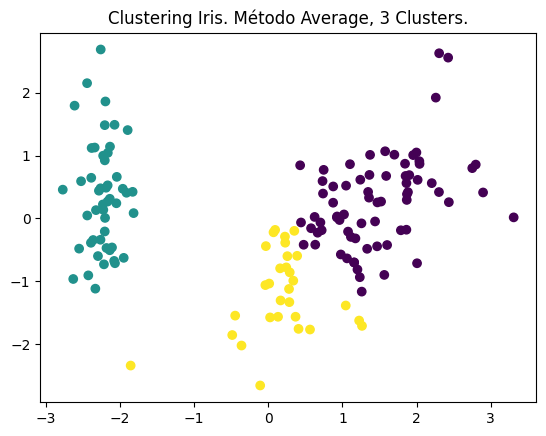

In [8]:
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(
    n_clusters=3, metric="euclidean", linkage="ward"
)
labels = agc.fit_predict(X_sc)
pca_viz(
    pca_iris,
    color=labels,
    title="Clustering Iris. Método Average, 3 Clusters.",
)

## Transformarlo en función para probar muchas combinaciones...